## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import pathlib

# Append the pocketoptimizer code to your $PYTHONPATH
sys.path.append(str(pathlib.Path.cwd().parent.resolve()))

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir='/agh/projects/pocketoptimizer/pocketoptimizer/tutorials/TrpR_IAA', # Path to working directory containing scaffold and ligand subdirectory
                           ph=7,                         # pH used for protein and ligand protonation
                           forcefield='amber_ff14SB',    # forcefield used for all energy computations (Use Amber as it is better tested!)
                           ncpus=8)                      # Number of CPUs for multiprocessing

2024-02-02 13:10:12,715 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/pocketoptimizer/pocketoptimizer/tutorials/TrpR_IAA/pocketoptimizer.log


### From now on you are inside the directory of your design!

In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf',  # Input ligand structure file could be .mol2/.sdf
                           addHs=True                      # Whether to add hydrogen atoms to the input structure
                           )

2023-11-09 10:28:29,868 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-11-09 10:28:29,868 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2023-11-09 10:28:32,214 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2023-11-09 10:28:33,299 - moleculekit.readers - WARNING - MoleculeKit will only read the first molecule from the SDF file.
2023-11-09 10:28:33,724 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2023-11-09 10:28:36,347 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2023-11-09 10:28:36,580 - pocketoptimizer.preparation.structure_building - INFO - Ligand parametrization was successful.


In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],   # Specific protein chains to keep
    backbone_restraint=True,  # Restrains the backbone during the minimization
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2023-11-09 10:28:37,236 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2023-11-09 10:28:37,350 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2023-11-09 10:28:37,972 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2023-11-09 10:28:38,914 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2023-11-09 10:28:38,915 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2023-11-09 10:28:38,915 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2023-11-09 10:28:38,915 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2023-11-09 10:28:38,916 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2023-11-09 10:28:38,916 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2023-11-09 10:28:38,916 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2023-11-09 10:28:40,318 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2023-11-09 10:28:40,319 - pocketoptimizer.ui - INFO - Building complex.
2023-11-0

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce (Sometimes these methods produce lower number of conformations)
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2023-11-09 10:28:47,026 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2023-11-09 10:28:47,027 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2023-11-09 10:28:47,409 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2023-11-09 10:28:47,410 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:
# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)

2023-11-09 10:28:47,651 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2023-11-09 10:28:48,425 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2023-11-09 10:28:48,426 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2023-11-09 10:28:48,630 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2023-11-09 10:28:48,939 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2023-11-09 10:28:49,058 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2023-11-09 10:28:49,246 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2023-11-09 10:28:49,949 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2023-11-09 10:28:50,275 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2023-11-09 10:28:50,373 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2023-11-09 10:28:50,557 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2023-11-09 10:28:51,245 - 

In [8]:
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,         # Energy threshold of 100 kcal/mol for filtering rotamers
    library='dunbrack',            # Use dunbrack rotamer library (Should be used!)
    dunbrack_filter_thresh=0.01    # Probability threshold for filtering rotamers (1%)
)

2023-11-09 10:29:09,326 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2023-11-09 10:29:09,606 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2023-11-09 10:29:16,115 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 18/27 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2023-11-09 10:29:16,128 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/9 [00:00<?, ?it/s]

2023-11-09 10:29:21,405 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/9 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2023-11-09 10:29:21,412 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/180 [00:00<?, ?it/s]

2023-11-09 10:29:39,938 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 176/180 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2023-11-09 10:29:39,955 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/45 [00:00<?, ?it/s]

2023-11-09 10:29:47,678 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 27/45 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2023-11-09 10:29:47,688 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/9 [00:00<?, ?it/s]

2023-11-09 10:29:52,983 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/9 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2023-11-09 10:29:52,992 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol for filtering ligand poses
    max_poses=10000        #  Maximum number of poses
)

2023-11-09 10:30:49,191 - pocketoptimizer.ui - INFO - Using 8 CPU(s) for multiprocessing.
2023-11-09 10:30:49,193 - pocketoptimizer.ui - INFO - Sample ligand poses.
2023-11-09 10:30:49,194 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2023-11-09 10:30:49,786 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformer(s):   0%|          | 0/50 [00:00<?, ?it/s]

2023-11-09 10:30:49,823 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4550 poses.
2023-11-09 10:30:49,823 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2023-11-09 10:30:49,823 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPU(s) for multiprocessing.


Filter Pose(s):   0%|          | 0/4550 [00:00<?, ?it/s]

2023-11-09 10:35:44,547 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 820 pose(s) within energy threshold of 100 kcal/mol.
2023-11-09 10:35:44,579 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2023-11-09 10:35:44,611 - pocketoptimizer.ui - INFO - Start energy calculations.
2023-11-09 10:35:44,612 - pocketoptimizer.ui - INFO - Using 8 CPU(s) for multiprocessing.
2023-11-09 10:35:44,612 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2023-11-09 10:35:44,613 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2023-11-09 10:35:44,647 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/18 [00:00<?, ?it/s]

2023-11-09 10:35:49,444 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2023-11-09 10:35:53,180 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/176 [00:00<?, ?it/s]

2023-11-09 10:36:01,230 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2023-11-09 10:36:06,072 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2023-11-09 10:36:09,758 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold calculation was successful.
2023-11-09 10:36:09,759 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2023-11-09 10:36:09,759 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2023-11-09 10:36:09,890 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/3168 [00:00<?, ?it/s]

2023-11-09 10:36:14,920 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/1056 [00:00<?, ?it/s]

2023-11-09 10:36:19,852 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/486 [00:00<?, ?it/s]

2023-11-09 10:36:24,330 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/108 [00:00<?, ?it/s]

2023-11-09 10:36:28,992 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/162 [00:00<?, ?it/s]

2023-11-09 10:36:33,595 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/36 [00:00<?, ?it/s]

2023-11-09 10:36:38,359 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/4752 [00:00<?, ?it/s]

2023-11-09 10:36:43,648 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/1056 [00:00<?, ?it/s]

2023-11-09 10:36:48,306 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2023-11-09 10:36:48,307 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2023-11-09 10:36:48,315 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2023-11-09 10:36:48,849 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold interaction energy not computed yet.
2023-11-09 10:36:48,849 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-09 10:36:50,217 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.


Ligand/A_44_LEU:   0%|          | 0/18 [00:00<?, ?it/s]

2023-11-09 10:36:56,555 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.


Ligand/A_44_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2023-11-09 10:36:58,648 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.


Ligand/B_84_ARG:   0%|          | 0/176 [00:00<?, ?it/s]

2023-11-09 10:38:10,066 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.


Ligand/B_88_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2023-11-09 10:38:22,301 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.


Ligand/B_88_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2023-11-09 10:38:24,978 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2023-11-09 10:38:24,978 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2023-11-09 10:38:41,727 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2023-11-09 10:38:49,116 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2023-11-09 10:38:49,217 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2023-11-09 10:38:50,100 - pocketoptimizer.ui - INFO - Write text report.
2023-11-09 10:38:50,139 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2023-11-09 10:38:50,141 - pocketoptimizer.ui - INFO - Wrote summary text file.
2023-11-09 10:38:50,142 - pocketoptimizer.ui - INFO - Write html report.
2023-11-09 10:38:50,205 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2023-11-09 10:38:50,206 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2023-11-09 10:38:50,432 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


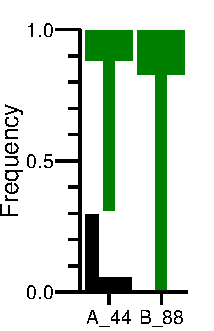

2023-11-09 10:38:50,697 - pocketoptimizer.ui - INFO - Wrote summary html file.
2023-11-09 10:38:50,698 - pocketoptimizer.ui - INFO - Creating design structure files.
2023-11-09 10:38:50,699 - pocketoptimizer.ui - INFO - Create Structures.
2023-11-09 10:38:53,858 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2023-11-09 10:38:53,879 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 5 identified.


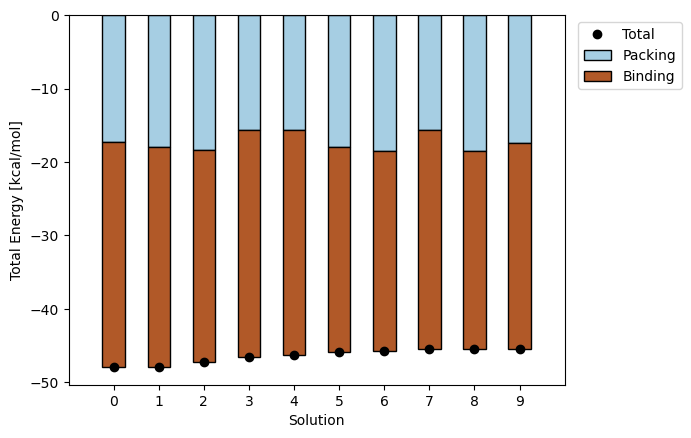

In [12]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=5,          #  Scaling factor for binding-related energies (You need to adapt this to approximate the packing and binding energies)
)

In [3]:
# Do not run this unless you want to fully clean your working directory from all created files and folders!
design.clean(scaffold=True, ligand=True)

2023-11-08 16:55:36,402 - pocketoptimizer.ui - INFO - No scaffold files found.
2023-11-08 16:55:36,404 - pocketoptimizer.ui - INFO - All scaffold files were deleted.
2023-11-08 16:55:36,406 - pocketoptimizer.ui - INFO - No ligand files found.
2023-11-08 16:55:36,406 - pocketoptimizer.ui - INFO - All ligand files were deleted.
2023-11-08 16:55:36,408 - pocketoptimizer.ui - INFO - Logfile was deleted.
